In [1]:
# All external libraries used in development
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score, recall_score,f1_score

In [2]:
# Creating the dataframe for breast cancer diagnosis classification
diagnosis_df = pd.read_csv("wdbc.data", sep = ",",header = None)
# Renaming the column headers 
diagnosis_df.rename(columns={0: "ID", 1 : "Diagnosis"},inplace = True)
diagnosis_df

,ID,Diagnosis,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
#Neural Network was designed based on the book Neural Networks from scratch by Harrison Kinsley & Daniel Kukieła
#some of the code is also based on a Neural Networks youtube tutorial https://www.youtube.com/watch?v=pauPCy_s0Ok


#This handles the properties common to all layers in the network
class Layer:
    def __init__(self):
        self.input = None
        self.output = None

    def forward(self, input): # To compute the output of a layer given an input
        
        pass

    def back_propagation(self, output_gradient, learning_rate):
        # To compute the derivative of the error with respect to its input and update parameters
        pass

In [4]:
#This layer inherits from the class (Layer) ,it will be performing the forward pass 
#and backpropagation operations
class Hidden(Layer):
    # initialise vairables to store number of input neurons , number of output neurons for the layer
    def __init__(self, input_size, output_size):
        np.random.seed(42)
        # Weights - Rows: Number of Neurons, Columns: Number of Input Features
        self.weights = np.random.randn(output_size, input_size)
        # Bias - Rows: Number of Neurons, Columns: 1
        self.bias = np.random.randn(output_size, 1)
        
    # returns output for a given input after performing the foward pass 
    def forward(self, input):
        # Number of Input Features, Number of Samples
        self.input = input
        # Output - Number of Neurons in Layer, Columns: Number of Samples
        self.output = np.dot(self.weights, self.input) + self.bias
        return self.output
    
    def back_propagation(self, output_gradient, learning_rate):
        #dE/dw - Error gradient with respect to weights
        weights_gradient = np.dot(self.input, output_gradient)
        #dE/db - Error gradient with respect to bias
        bias_gradient = np.sum(output_gradient,axis = 0, keepdims = True)
        #dE/dx Error gradient with respect to inputs
        input_gradient = np.dot(output_gradient,self.weights)
        # function to updating the weights and biases
        self.weights -= learning_rate * weights_gradient.T
        self.bias = self.bias - (learning_rate * bias_gradient).T
        # Return gradient with respect to inputs
        return input_gradient
    

In [5]:
#The layer inherits from the class (Layer) , 
#the operations common to the activation functions are defined within the Activation Layer class
class Activation_func(Layer):
    def __init__(self, activation, act_derivative):
        self.activation = activation
        self.act_derivative = act_derivative
        
    # returns the input after the activation function has been applied
    def forward(self, input):
        self.input = input
        return self.activation(self.input)
    
    # returns input error for a given output error.
    def back_propagation(self, output_gradient, learning_rate):
        return np.multiply(output_gradient, self.act_derivative(self.input.T))

In [6]:
#Each activation that is available to be used by the network is defined and inherits from the the Activation class

# Sigmoid activation function and its derivative
class Sigmoid(Activation_func):
    def __init__(self):
        def sigmoid(x):
            activated_output = 1 / (1 + np.exp(-x))
            activated_output = activated_output.astype(np.longdouble)
            return activated_output

        def sigmoid_deriv(x):
            s = sigmoid(x)
            return s * (1 - s)

        super().__init__(sigmoid, sigmoid_deriv)

# hyperbolic tangent activation function and its derivative
class Tanh(Activation_func):
    def __init__(self):
        def tanh(x):
            return np.tanh(x)

        def tanh_deriv(x):
            return 1 - np.tanh(x) ** 2

        super().__init__(tanh, tanh_deriv)
        
# the ReLu (Rectified Linerar Unit) activation function and its derivative      
class ReLu(Activation_func):
    def __init__(self):
        def relu(x):
            activated_output = np.maximum(0,x)
            return activated_output
        def relu_deriv(x): 
            return np.greater(x, 0)
        
        super().__init__(relu, relu_deriv)
       


In [7]:
#defining loss functions to be used in the network

# mean_squared_error loss function and its derivative
def mse(y_true, y_pred):
    return np.mean(np.power(y_true.T - y_pred, 2))

def mse_deriv(y_true, y_pred):
    return 2 * (y_pred.T - y_true) / np.size(y_true)

# binary cross entropy loss function and its derivative
def cross_entropy(y_true, y_pred):
    y_pred_clipped = np.clip(y_pred,1e-7, 1- 1e-7)  
    return np.mean(-(y_true * np.log(y_pred_clipped) + (1 - y_true) * np.log(1 - y_pred_clipped)))

def cross_entropy_deriv(y_true, y_pred):
    y_pred_clipped = np.clip(y_pred,1e-7, 1- 1e-7)  
    return ((1 - y_true) / (1 - y_pred_clipped) - y_true / y_pred_clipped) / np.size(y_true)

#hinge loss function 
# the code use was found on ;
# https://stackoverflow.com/questions/53244095/hinge-loss-function-gradient-w-r-t-input-prediction

def hinge_loss(y_true,y_pred):
    hinge = np.sum((np.maximum(0, 1 - y_pred * y_true)) / y_pred.size)
    return hinge
def hinge_loss_deriv(y_true,y_pred):
    hinge_deriv = np.where(y_pred * y_true < 1, -y_true / y_pred.size, 0)
    return hinge_deriv

In [8]:
# Predict function for model
def predict(network, inputs):
    output = inputs
    for layer in network:
        output = layer.forward(output)
    return output

# Training function for model
def train(network, loss, loss_deriv, x_train, y_train, epochs, learning_rate, num_of_batches, verbose = True, lr_decay = None):
    if num_of_batches == None:
        num_of_batches = len(x_train)
    if num_of_batches > len(x_train):
        sys.exit("The number of batches exceeds the number of training samples, please provide ensure that the number of batches is less than", len(x_train))  
    # List of errors over epochs
    errors = []
    # List of epoch numbers
    epoch_num = []
    # Ensuring learning rate is not above 0 and below 1
    learning_rate = np.clip(learning_rate,1e-5,1)
    for e in range(epochs):
        # Samples in a batch
        sample_size = int(np.trunc(x_train.shape[0] / num_of_batches))
        last_index = sample_size
        # Total Error
        error = 0
        for i in range(0, x_train.shape[0], sample_size):
            # All records in a batch
            x_batch = x_train[i: last_index]
            y_batch = y_train[i:last_index]
            last_index += sample_size
            # forward pass over NN
            output = predict(network, x_batch.T)
            # error accumulation
            error += loss(y_batch, output)
            # backward pass over NN
            grad = loss_deriv(y_batch, output)
            for layer in reversed(network):
                grad = layer.back_propagation(grad, learning_rate)
        # Mean Error
        error /= len(x_train)
        # Learning Rate decay 
        if lr_decay != None:
            learning_rate = (1 / (1+lr_decay*e))* learning_rate
        errors.append(error)
        epoch_num.append(e+1)
        # Display of errors over epochs
        if verbose:
            print(f"{e + 1}/{epochs}, error={error}")
    # Returns errors over epoch list and list of epoch number  
    return epoch_num, errors

In [9]:
diagnosis_df['Diagnosis'].replace(['B','M'],
                        [0, 1], inplace=True)

In [10]:
diagnosis_df.drop(columns=["ID"], inplace=True)


In [11]:
diagnosis_df['Diagnosis'] = diagnosis_df['Diagnosis'].astype('float')
#diagnosis_df.dtypes

In [12]:
features = diagnosis_df.iloc[:,1:]
# Separating out the features
x_all = features.values
# Separating out the target class
y_all = diagnosis_df.loc[:,['Diagnosis']].values

# using the train test split function
x_train, x_test, y_train, y_test = train_test_split(x_all,y_all ,
                                   random_state=104, 
                                   test_size=0.25, 
                                   shuffle=True)


In [13]:
# Scaling of input features
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [14]:
# Initial model
default_network = [
    Hidden(30,10),
    ReLu(),
    Hidden(10, 10),
    ReLu(),
    Hidden(10,1),
    Sigmoid()
]


# training of initial model
trained_model = train(default_network, mse, mse_deriv, x_train, y_train, epochs=50, learning_rate=0.5,num_of_batches = 10, lr_decay = None)

# testing of initial model
y_pred = []
y_actual = []
for x, y in zip(x_test, y_test):
    output = predict(default_network, x.reshape(x_test.shape[1], 1))
    y_hat = np.rint(output.item())
    y_pred.append(y_hat)
    y_actual.append(y.item())
    error = mse(y,output.item())
    print('pred:', int(y_hat), 'true:', int(y.item())) 

1/50, error=0.007937512296284036
2/50, error=0.002383285495527474
3/50, error=0.0016955584247850975
4/50, error=0.0012850713903120338
5/50, error=0.0009921732107607435
6/50, error=0.0007682323472690771
7/50, error=0.000634347945886954
8/50, error=0.000576985216261254
9/50, error=0.000539331546511827
10/50, error=0.0004931110912123614
11/50, error=0.0004557638187757102
12/50, error=0.0004377138914056527
13/50, error=0.00042691495852581853
14/50, error=0.0004176310703009224
15/50, error=0.00041013849242731675
16/50, error=0.00040388060742099476
17/50, error=0.00039871993952135597
18/50, error=0.000394533415532096
19/50, error=0.00039107417578850424
20/50, error=0.00038830531329469935
21/50, error=0.00038595852159404746
22/50, error=0.00038384690518236295
23/50, error=0.000381909039379306
24/50, error=0.0003801514115190753
25/50, error=0.0003784708086844584
26/50, error=0.00037690978855625483
27/50, error=0.0003754273944205639
28/50, error=0.0003740669050396161
29/50, error=0.000372756534

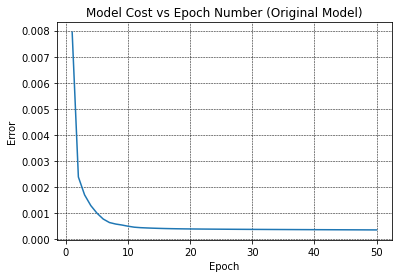

In [15]:
# Cost Function vs Epochs Original Model
fig, ax = plt.subplots()
ax.plot(trained_model[0],trained_model[1])
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.title('Model Cost vs Epoch Number (Original Model)')
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5)
plt.show()

In [16]:
# Confusion matrix for original model
cm = confusion_matrix(y_actual, y_pred)
print("Accuracy Metrics\n")
print("True Positive :", cm[0,0], "\n")
print("True Negative :", cm[1,1], "\n")
print("False Positive :", cm[0,1], "\n")
print("False Negative :", cm[1,0], "\n")
print("Accuracy:",accuracy_score(y_actual, y_pred),"\n")
print('Precision:',precision_score(y_actual, y_pred),"\n")
print('Recall:',recall_score(y_actual, y_pred),"\n")
print('F1-score:',f1_score(y_actual, y_pred))

Accuracy Metrics

True Positive : 83 

True Negative : 54 

False Positive : 4 

False Negative : 2 

Accuracy: 0.958041958041958 

Precision: 0.9310344827586207 

Recall: 0.9642857142857143 

F1-score: 0.9473684210526316


In [17]:
# Hyperparameter testing for Number of Layers
network1 = [
    Hidden(30,10),
    ReLu(),
    Hidden(10, 1),
    Sigmoid()
]

network2 = [
    Hidden(30,10),
    ReLu(),
    Hidden(10, 10),
    ReLu(),
    Hidden(10, 1),
    Sigmoid()
]

network3 = [
    Hidden(30,10),
    ReLu(),
    Hidden(10,10),
    ReLu(),
    Hidden(10,10),
    ReLu(),
    Hidden(10, 1),
    Sigmoid()
]
    

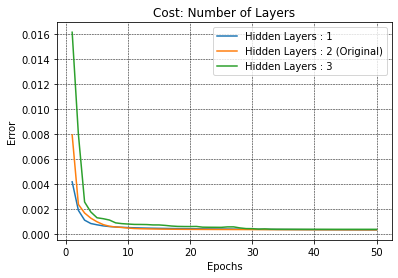

In [18]:
# List of networks
num_hidden_layers = [network1,network2,network3]
# list of network errors
model_errors1 = []
for nn in num_hidden_layers:
    model = train(nn, mse, mse_deriv, x_train, y_train, epochs=50, learning_rate=0.5,num_of_batches = 10, verbose = False,lr_decay = None)
    model_errors1.append(model)
# plotting of comparison graph
plt.plot(model_errors1[0][0],model_errors1[0][1],label = "Hidden Layers : 1")
plt.plot(model_errors1[1][0],model_errors1[1][1],label = "Hidden Layers : 2 (Original)")
plt.plot(model_errors1[2][0],model_errors1[2][1],label = "Hidden Layers : 3")
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.ylabel('Error')
plt.xlabel('Epochs')
plt.title("Cost: Number of Layers")
plt.show()

In [19]:
# Hyperparameter testing for Number of Hidden Nodes
network4 = [
    Hidden(30,15),
    ReLu(),
    Hidden(15, 15),
    ReLu(),
    Hidden(15, 1),
    Sigmoid()
]    
network5 = [
    Hidden(30,10),
    ReLu(),
    Hidden(10, 10),
    ReLu(),
    Hidden(10, 1),
    Sigmoid()
]

network6 = [
    Hidden(30,5),
    ReLu(),
    Hidden(5, 5),
    ReLu(),
    Hidden(5, 1),
    Sigmoid()
]
    

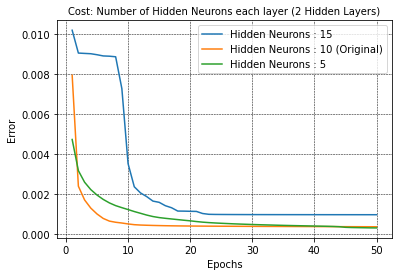

In [20]:
num_hidden_nodes = [network4,network5,network6]
model_errors2 = []
for nn in num_hidden_nodes:
    model = train(nn, mse, mse_deriv, x_train, y_train, epochs=50, learning_rate=0.5,num_of_batches = 10, verbose = False, lr_decay = None)
    model_errors2.append(model)
plt.plot(model_errors2[0][0],model_errors2[0][1],label = "Hidden Neurons : 15")
plt.plot(model_errors2[1][0],model_errors2[1][1],label = "Hidden Neurons : 10 (Original)")
plt.plot(model_errors2[2][0],model_errors2[2][1],label = "Hidden Neurons : 5")
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.ylabel('Error')
plt.xlabel('Epochs')
plt.title("Cost: Number of Hidden Neurons each layer (2 Hidden Layers)", fontsize = 10)
plt.show()

In [21]:
# Hyperparameter testing for Hidden Layer Activation functions
network7 = [
    Hidden(30,10),
    ReLu(),
    Hidden(10, 10),
    ReLu(),
    Hidden(10, 1),
    Sigmoid()
]    
network8 = [
    Hidden(30,10),
    Tanh(),
    Hidden(10, 10),
    Tanh(),
    Hidden(10, 1),
    Sigmoid()
]

network9 = [
    Hidden(30,10),
    Sigmoid(),
    Hidden(10, 10),
    Sigmoid(),
    Hidden(10, 1),
    Sigmoid()
]
    

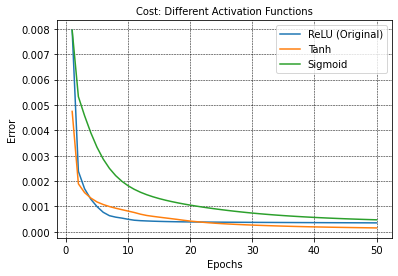

In [22]:
num_hidden_nodes = [network7,network8,network9]
model_errors3 = []
for nn in num_hidden_nodes:
    model = train(nn, mse, mse_deriv, x_train, y_train, epochs=50, learning_rate=0.5,num_of_batches = 10, verbose = False, lr_decay = None)
    model_errors3.append(model)
plt.plot(model_errors3[0][0],model_errors3[0][1],label = "ReLU (Original)")
plt.plot(model_errors3[1][0],model_errors3[1][1],label = "Tanh")
plt.plot(model_errors3[2][0],model_errors3[2][1],label = "Sigmoid")
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.ylabel('Error')
plt.xlabel('Epochs')
plt.title("Cost: Different Activation Functions", fontsize = 10)
plt.show()

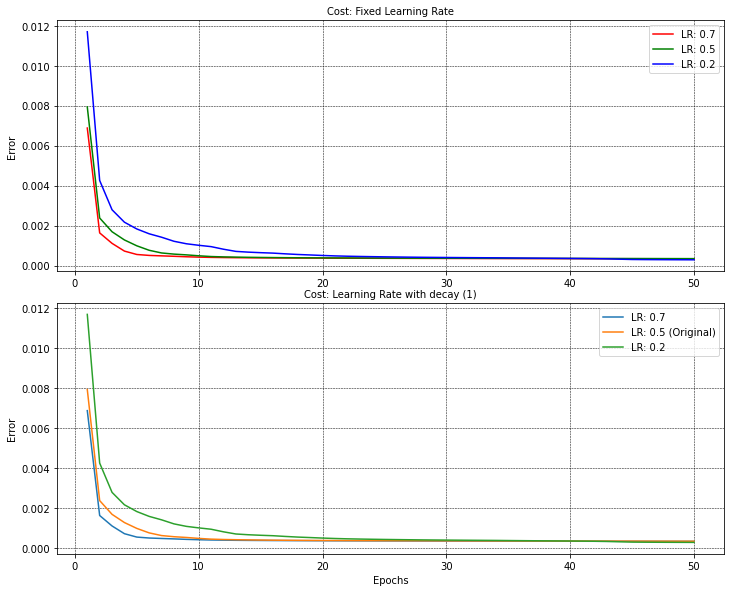

In [23]:
# Hyperparameter testing for Learning rates and learning rate schedules
network10 = [
    Hidden(30,10),
    ReLu(),
    Hidden(10, 10),
    ReLu(),
    Hidden(10, 1),
    Sigmoid()
]   
network11 = [
    Hidden(30,10),
    ReLu(),
    Hidden(10, 10),
    ReLu(),
    Hidden(10, 1),
    Sigmoid()
]   
network12 = [
    Hidden(30,10),
    ReLu(),
    Hidden(10, 10),
    ReLu(),
    Hidden(10, 1),
    Sigmoid()
]   
network13 = [
    Hidden(30,10),
    ReLu(),
    Hidden(10, 10),
    ReLu(),
    Hidden(10, 1),
    Sigmoid()
]   
network14 = [
    Hidden(30,10),
    ReLu(),
    Hidden(10, 10),
    ReLu(),
    Hidden(10, 1),
    Sigmoid()
]   
network15 = [
    Hidden(30,10),
    ReLu(),
    Hidden(10, 10),
    ReLu(),
    Hidden(10, 1),
    Sigmoid()
]   
learning_rates = [0.7,0.5,0.2,0.7,0.5,0.2]
lr_decay_list = [None,None,None,1,1,1]
learning_rate_networks = [network10,network11,network12,network13,network14,network15]
model_errors4 = []
for lr,lrd,nn in zip(learning_rates,lr_decay_list,learning_rate_networks):
    model = train(nn, mse, mse_deriv, x_train, y_train, epochs=50, learning_rate=lr,num_of_batches = 10, verbose = False, lr_decay = lrd)
    model_errors4.append(model)
plt.subplots(2,1, figsize = (10,8))
plt.subplot(2,1,1)
plt.tight_layout()
plt.plot(model_errors4[0][0],model_errors4[0][1],label = "LR: 0.7", color = 'red')
plt.plot(model_errors4[1][0],model_errors4[1][1],label = "LR: 0.5", color = 'green')
plt.plot(model_errors4[2][0],model_errors4[2][1],label = "LR: 0.2", color = 'blue')
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.ylabel('Error')
plt.title("Cost: Fixed Learning Rate", fontsize = 10)
plt.subplot(2,1,2)
plt.plot(model_errors4[3][0],model_errors4[0][1],label = "LR: 0.7")
plt.plot(model_errors4[4][0],model_errors4[1][1],label = "LR: 0.5 (Original)")
plt.plot(model_errors4[5][0],model_errors4[2][1],label = "LR: 0.2")
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.ylabel('Error')
plt.xlabel('Epochs')
plt.title("Cost: Learning Rate with decay (1)", fontsize = 10)
plt.show()

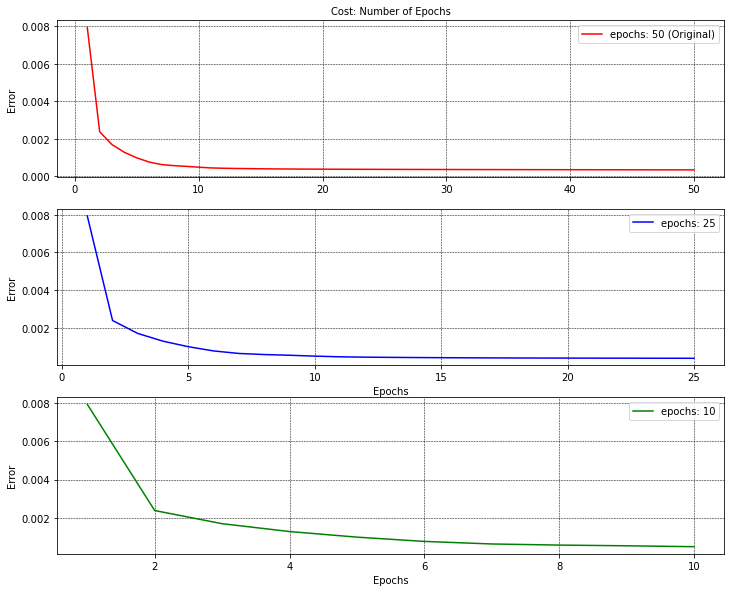

In [24]:
# Hyperparameter testing for Number of Epochs
network16 = [
    Hidden(30,10),
    ReLu(),
    Hidden(10, 10),
    ReLu(),
    Hidden(10, 1),
    Sigmoid()
]   
network17 = [
    Hidden(30,10),
    ReLu(),
    Hidden(10, 10),
    ReLu(),
    Hidden(10, 1),
    Sigmoid()
]   
network18 = [
    Hidden(30,10),
    ReLu(),
    Hidden(10, 10),
    ReLu(),
    Hidden(10, 1),
    Sigmoid()
]   

epoch_networks = [network16,network17,network18]
epoch_list = [50,25,10]
model_errors5 = []
for nn,e in zip(epoch_networks,epoch_list):
    model = train(nn, mse, mse_deriv, x_train, y_train, epochs=e, learning_rate= 0.5,num_of_batches = 10, verbose = False, lr_decay = None)
    model_errors5.append(model)
plt.subplots(3,1, figsize = (10,8))
plt.subplot(3,1,1)
plt.tight_layout()
plt.plot(model_errors5[0][0],model_errors5[0][1],label = "epochs: 50 (Original)", color = 'red')
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.ylabel('Error')
plt.title("Cost: Number of Epochs", fontsize = 10)
plt.subplot(3,1,2)
plt.plot(model_errors5[1][0],model_errors5[1][1],label = "epochs: 25", color = 'blue')
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.ylabel('Error')
plt.xlabel('Epochs')
plt.subplot(3,1,3)
plt.plot(model_errors5[2][0],model_errors5[2][1],label = "epochs: 10", color = 'green')
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.ylabel('Error')
plt.xlabel('Epochs')
plt.show()

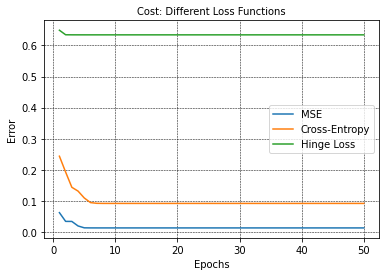

In [25]:
# Hyperparameter testing for different loss functions
network19 = [
    Hidden(30,10),
    Tanh(),
    Hidden(10, 10),
    ReLu(),
    Hidden(10, 1),
    Sigmoid()
]   
network20 = [
    Hidden(30,10),
    Tanh(),
    Hidden(10, 10),
    Tanh(),
    Hidden(10, 1),
    Sigmoid()
]   
network21 = [
    Hidden(30,10),
    Tanh(),
    Hidden(10, 10),
    Tanh(),
    Hidden(10, 1),
    Sigmoid()
]   

loss_networks = [network19,network20,network21]
loss_func = [mse,cross_entropy,hinge_loss]
loss_func_deriv = [mse_deriv,cross_entropy_deriv,hinge_loss_deriv]
model_errors6 = []
for nn,l,ld in zip(loss_networks,loss_func,loss_func_deriv):
    model = train(nn, l, ld, x_train, y_train, epochs=50, learning_rate=0.5,num_of_batches = None, verbose = False, lr_decay = 1)
    model_errors6.append(model)
plt.plot(model_errors6[0][0],model_errors6[0][1],label = "MSE")
plt.plot(model_errors6[1][0],model_errors6[1][1],label = "Cross-Entropy")
plt.plot(model_errors6[2][0],model_errors6[2][1],label = "Hinge Loss")
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.ylabel('Error')
plt.xlabel('Epochs')
plt.title("Cost: Different Loss Functions", fontsize = 10)
plt.show()

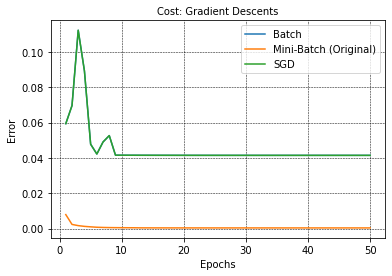

In [26]:
# Hyperparameter testing for Batch Sizes 
network22 = [
    Hidden(30,10),
    ReLu(),
    Hidden(10, 10),
    ReLu(),
    Hidden(10, 1),
    Sigmoid()
]   
network23 = [
    Hidden(30,10),
    ReLu(),
    Hidden(10, 10),
    ReLu(),
    Hidden(10, 1),
    Sigmoid()
]   
network24 = [
    Hidden(30,10),
    ReLu(),
    Hidden(10, 10),
    ReLu(),
    Hidden(10, 1),
    Sigmoid()
]   

batch_networks = [network22,network23,network24]
batches = [len(x_train),10,None]
model_errors7 = []
for nn,b in zip(batch_networks,batches):
    model = train(nn, mse, mse_deriv, x_train, y_train, epochs=50, learning_rate=0.5,num_of_batches = b, verbose = False,lr_decay = 0.01)
    model_errors7.append(model)
plt.plot(model_errors7[0][0],model_errors7[0][1],label = "Batch")
plt.plot(model_errors7[1][0],model_errors7[1][1],label = "Mini-Batch (Original)")
plt.plot(model_errors7[2][0],model_errors7[2][1],label = "SGD")
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.ylabel('Error')
plt.xlabel('Epochs')
plt.title("Cost: Gradient Descents", fontsize = 10)
plt.show()

In [27]:
# Tweaked model
tweaked_network = [
    Hidden(30,10),
    Tanh(),
    Hidden(10,1),
    Sigmoid()
]


# training of tweaked model
trained_model2 = train(tweaked_network, mse, mse_deriv, x_train, y_train, epochs=10, learning_rate=0.7,num_of_batches = 10, lr_decay = None)

# testing of tweaked model
y_pred2 = []
y_actual2 = []
for x, y in zip(x_test, y_test):
    output = predict(default_network, x.reshape(x_test.shape[1], 1))
    y_hat = np.rint(output.item())
    y_pred.append(y_hat)
    y_actual.append(y.item())
    error = mse(y,output.item())
    print('pred:', int(y_hat), 'true:', int(y.item())) 

1/10, error=0.0024569276431995308
2/10, error=0.001240909701429675
3/10, error=0.0008782294926623584
4/10, error=0.0007604297101073399
5/10, error=0.0006970292390814458
6/10, error=0.0006527067834510081
7/10, error=0.0006175783506060564
8/10, error=0.0005878312138417371
9/10, error=0.0005617312151098366
10/10, error=0.0005384453281205036
pred: 1 true: 1
pred: 1 true: 1
pred: 1 true: 1
pred: 0 true: 0
pred: 1 true: 1
pred: 0 true: 0
pred: 1 true: 1
pred: 0 true: 0
pred: 0 true: 0
pred: 1 true: 1
pred: 1 true: 1
pred: 0 true: 0
pred: 1 true: 1
pred: 1 true: 1
pred: 1 true: 0
pred: 0 true: 0
pred: 0 true: 0
pred: 0 true: 0
pred: 1 true: 0
pred: 0 true: 0
pred: 0 true: 0
pred: 1 true: 1
pred: 0 true: 0
pred: 0 true: 0
pred: 0 true: 0
pred: 1 true: 1
pred: 1 true: 1
pred: 1 true: 1
pred: 0 true: 0
pred: 0 true: 0
pred: 0 true: 0
pred: 1 true: 1
pred: 0 true: 0
pred: 1 true: 1
pred: 0 true: 0
pred: 0 true: 0
pred: 1 true: 1
pred: 0 true: 0
pred: 0 true: 0
pred: 0 true: 0
pred: 0 true: 0
pred

In [28]:
# Confusion matrix for tweaked model
cm2 = confusion_matrix(y_actual2, y_pred2)
print("Accuracy Metrics\n")
print("True Positive :", cm[0,0], "\n")
print("True Negative :", cm[1,1], "\n")
print("False Positive :", cm[0,1], "\n")
print("False Negative :", cm[1,0], "\n")
print("Accuracy:",accuracy_score(y_actual, y_pred),"\n")
print('Precision:',precision_score(y_actual, y_pred),"\n")
print('Recall:',recall_score(y_actual, y_pred),"\n")
print('F1-score:',f1_score(y_actual, y_pred))

Accuracy Metrics

True Positive : 83 

True Negative : 54 

False Positive : 4 

False Negative : 2 

Accuracy: 0.958041958041958 

Precision: 0.9310344827586207 

Recall: 0.9642857142857143 

F1-score: 0.9473684210526316


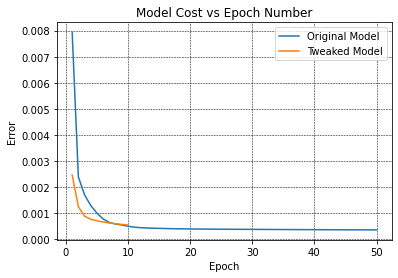

In [29]:
# Original vs Tweaked Model
plt.plot(trained_model[0],trained_model[1], label = 'Original Model')
plt.plot(trained_model2[0],trained_model2[1], label = 'Tweaked Model')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.title('Model Cost vs Epoch Number')
plt.legend()
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5)
plt.show()